In [34]:
#################################################################################################################
################################ Getting the file from local CSV      ###########################################
#################################################################################################################
# Load Packages / libraries
import numpy as np
import pandas as pd
import pypyodbc as podbc
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Configure notebook settings
np.set_printoptions(formatter={'float_kind':'{:f}'.format}) # To change scientific numbers to float
sns.set(rc={'figure.figsize':(8,6)}) # Increases the size of sns plots

# Loading the data
df = pd.read_csv('../00. output/clean.csv')

# print the shape
print(df.shape)

#runs the first 5 rows
df.head()

(14778, 13)


,age,are_food_areas_important_to_you,current_status,did_you_find_our_events_value_for_money,do_you_enjoy_adrenaline_rush_activities,favourite_attraction,gender,how_many_hours_are_you_willing_to_travel_to_attend_an_event,how_often_you_attend_entertaining_events_in_a_year,social_media,total_household_income,were_you_satisfied_with_the_last_event_you_attended_with_us,would_you_recommend_our_events_to_other_people
0,40-49,Entirely agree,Married with children,Somewhat disagree,Entirely disagree,Ice Bar,Female,3 hours,4 Times a Year,Up to 1 hour,"50,000 to 74,999",Somewhat agree,Somewhat Unlikely
1,60-64,Entirely agree,Married with children,Entirely disagree,Somewhat disagree,Happy Rollercoaster,Male,5 hours,3 Times a Year,Up to 1 hour,"35,000 to 49,999",Mostly agree,Somewhat Likely
2,50-59,Somewhat agree,Married with children,Entirely disagree,Somewhat disagree,Happy Rollercoaster,Male,5 hours,3 Times a Year,I don't spend any time at all,"75,000 to 99,999",Mostly agree,Mostly Unlikely
3,50-59,Neither agree nor disagree,Married without children,Somewhat disagree,Entirely agree,Crazy rollercoaster ride,Female,1 hour,1 Times a Year,Half a day,"35,000 to 49,999",Somewhat agree,Somewhat Likely
4,60-64,Neither agree nor disagree,Married with children,Entirely agree,Mostly disagree,Kids Playground,Male,6 hours plus,3 Times a Year,Up to 1 hour,"100,000 to 149,999",Entirely agree,Very Unlikely


In [35]:
##########################################################
######### Encode categorical variables to num. ########### 
##########################################################
# Original/raw data
print(f"Shape of original data: ", df.shape)

# Encoded data shape
df = pd.get_dummies(df)
print(f"Shape of encoded data: ", df.shape)

df.head()

Shape of original data:  (14778, 13)
Shape of encoded data:  (14778, 86)


,age_17 or younger,age_18-20,age_21-25,age_26-32,age_33-39,age_40-49,age_50-59,age_60-64,age_65 or older,are_food_areas_important_to_you_Entirely agree,...,were_you_satisfied_with_the_last_event_you_attended_with_us_Neither agree nor disagree,were_you_satisfied_with_the_last_event_you_attended_with_us_Somewhat agree,were_you_satisfied_with_the_last_event_you_attended_with_us_Somewhat disagree,would_you_recommend_our_events_to_other_people_Mostly Likely,would_you_recommend_our_events_to_other_people_Mostly Unlikely,would_you_recommend_our_events_to_other_people_Neither agree nor disagree,would_you_recommend_our_events_to_other_people_Somewhat Likely,would_you_recommend_our_events_to_other_people_Somewhat Unlikely,would_you_recommend_our_events_to_other_people_Very Likely,would_you_recommend_our_events_to_other_people_Very Unlikely
0,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [36]:
################################################################################################
########################## CLEAN/COMBINE VARIABLES TO IMPROVE RESULTS ##########################
################################################################################################

print("The shape is: ", df.shape)

# Cleaning the "how_often_you_attend_entertaining_events_in_a_year" column
# 1-2 times
df['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'] = 0
df['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'][(df['how_often_you_attend_entertaining_events_in_a_year_1 Times a Year'] == 1) |     (df['how_often_you_attend_entertaining_events_in_a_year_2 Times a Year'] == 1)] = 1
# 4-5 times
df['how_often_you_attend_entertaining_events_in_a_year_4_or_5_times'] = 0
df['how_often_you_attend_entertaining_events_in_a_year_4_or_5_times'][(df['how_often_you_attend_entertaining_events_in_a_year_4 Times a Year'] == 1) | (df['how_often_you_attend_entertaining_events_in_a_year_5+ Times a Year'] == 1)] = 1


# Cleaning the "social_media" column
# half a day + more than half a day
df['social_media_Half a day plus'] = 0
df['social_media_Half a day plus'][(df['social_media_Half a day'] == 1) | (df['social_media_More than half a day'] == 1)] = 1


# Cleaning the "how_many_hours_are_you_willing_to_travel_to_attend_an_event_1 hour" column
# 1 to 2 hours
df['how_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours'] = 0
df['how_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours'][(df['how_many_hours_are_you_willing_to_travel_to_attend_an_event_1 hour'] == 1) | (df['how_many_hours_are_you_willing_to_travel_to_attend_an_event_2 hours'] == 1)] = 1
# 3 to 4 hours
df['how_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours'] = 0
df['how_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours'][(df['how_many_hours_are_you_willing_to_travel_to_attend_an_event_3 hours'] == 1) | (df['how_many_hours_are_you_willing_to_travel_to_attend_an_event_4 hours'] == 1)] = 1
# 5 to 6 hours
df['how_many_hours_are_you_willing_to_travel_to_attend_an_event 5+ hours'] = 0
df['how_many_hours_are_you_willing_to_travel_to_attend_an_event 5+ hours'][(df['how_many_hours_are_you_willing_to_travel_to_attend_an_event_5 hours'] == 1) | (df['how_many_hours_are_you_willing_to_travel_to_attend_an_event_6 hours plus'] == 1)] = 1


# Cleaning the "do_you_enjoy_adrenaline_rush_activities" column
# Mostly & Somewhat Agree
df['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree'] = 0
df['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree'][(df['do_you_enjoy_adrenaline_rush_activities_Somewhat agree'] == 1) | (df['do_you_enjoy_adrenaline_rush_activities_Mostly agree'] == 1)] = 1
# Mostly & Somewhat Disagree
df['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree'] = 0
df['do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree'][(df['do_you_enjoy_adrenaline_rush_activities_Mostly disagree'] == 1) | (df['do_you_enjoy_adrenaline_rush_activities_Somewhat disagree'] == 1)] = 1


# Cleaning the "are_food_areas_important_to_you" column
# Mostly & Somewhat Agree
df['are_food_areas_important_to_you Agree'] = 0
df['are_food_areas_important_to_you Agree'][(df['are_food_areas_important_to_you_Mostly agree'] == 1) | (df['do_you_enjoy_adrenaline_rush_activities_Somewhat agree'] == 1)] = 1
# Mostly & Somewhat & entirely Disagree
df['are_food_areas_important_to_you Disagree'] = 0
df['are_food_areas_important_to_you Disagree'][(df['are_food_areas_important_to_you_Entirely disagree'] == 1) | (df['are_food_areas_important_to_you_Mostly disagree'] == 1) | (df['are_food_areas_important_to_you_Somewhat disagree'] == 1)] = 1


# Cleaning the "were_you_satisfied_with_the_last_event_you_attended_with_us" column
# Disagree
df['were_you_satisfied_with_the_last_event_you_attended_with_us Disagree'] = 0
df['were_you_satisfied_with_the_last_event_you_attended_with_us Disagree'][(df['were_you_satisfied_with_the_last_event_you_attended_with_us_Entirely disagree'] == 1) | (df['were_you_satisfied_with_the_last_event_you_attended_with_us_Mostly disagree'] == 1) | (df['were_you_satisfied_with_the_last_event_you_attended_with_us_Somewhat disagree'] == 1) | (df['were_you_satisfied_with_the_last_event_you_attended_with_us_Neither agree nor disagree'] == 1)] = 1


# Cleaning the "would_you_recommend_our_events_to_other_people" column
# Mostly & Somewhat & Neither Unlikely
df['would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely'] = 0
df['would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely'][(df['would_you_recommend_our_events_to_other_people_Mostly Unlikely'] == 1) | (df['would_you_recommend_our_events_to_other_people_Somewhat Unlikely'] == 1) | (df['would_you_recommend_our_events_to_other_people_Neither agree nor disagree'] == 1)] = 1


# Cleaning the "did_you_find_our_events_value_for_money" column
# Mostly & Somewhat agree
df['did_you_find_our_events_value_for_money Mostly & Somewhat agree'] = 0
df['did_you_find_our_events_value_for_money Mostly & Somewhat agree'][(df['did_you_find_our_events_value_for_money_Somewhat agree'] == 1) | (df['did_you_find_our_events_value_for_money_Mostly agree'] == 1)] = 1

The shape is:  (14778, 86)


C:\Users\jorda_6swzh7q\AppData\Local\Temp\ipykernel_10100\3288621394.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['how_often_you_attend_entertaining_events_in_a_year_1_or_2_times'][(df['how_often_you_attend_entertaining_events_in_a_year_1 Times a Year'] == 1) |     (df['how_often_you_attend_entertaining_events_in_a_year_2 Times a Year'] == 1)] = 1
C:\Users\jorda_6swzh7q\AppData\Local\Temp\ipykernel_10100\3288621394.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['how_often_you_attend_entertaining_events_in_a_year_4_or_5_times'][(df['how_often_you_attend_entertaining_events_in_a_year_4 Times a Year'] 

In [37]:
df.head()

,age_17 or younger,age_18-20,age_21-25,age_26-32,age_33-39,age_40-49,age_50-59,age_60-64,age_65 or older,are_food_areas_important_to_you_Entirely agree,...,how_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours,how_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours,how_many_hours_are_you_willing_to_travel_to_attend_an_event 5+ hours,do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree,do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree,are_food_areas_important_to_you Agree,are_food_areas_important_to_you Disagree,were_you_satisfied_with_the_last_event_you_attended_with_us Disagree,would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely,did_you_find_our_events_value_for_money Mostly & Somewhat agree
0,0,0,0,0,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
3,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0


In [38]:
# Excluding the fields we have merged together
feature_list = ['age_17 or younger', 'age_18-20', 'age_21-25', 'age_26-32', 'age_33-39',
       'age_40-49', 'age_50-59', 'age_60-64', 'age_65 or older',
       'are_food_areas_important_to_you_Entirely agree',
       #'are_food_areas_important_to_you_Entirely disagree',
       #'are_food_areas_important_to_you_Mostly agree',
       #'are_food_areas_important_to_you_Mostly disagree',
       'are_food_areas_important_to_you_Neither agree nor disagree',
       #'are_food_areas_important_to_you_Somewhat agree',
       #'are_food_areas_important_to_you_Somewhat disagree',
       'current_status_Divorced', 'current_status_Living with partner',
       'current_status_Married with children',
       'current_status_Married without children', 'current_status_Separated',
       'current_status_Single, never married', 'current_status_Step parent',
       'current_status_Widowed',
       'did_you_find_our_events_value_for_money_Entirely agree',
       'did_you_find_our_events_value_for_money_Entirely disagree',
       #'did_you_find_our_events_value_for_money_Mostly agree',
       'did_you_find_our_events_value_for_money_Mostly disagree',
       'did_you_find_our_events_value_for_money_Neither agree nor disagree',
       #'did_you_find_our_events_value_for_money_Somewhat agree',
       'did_you_find_our_events_value_for_money_Somewhat disagree',
       'do_you_enjoy_adrenaline_rush_activities_Entirely agree',
       'do_you_enjoy_adrenaline_rush_activities_Entirely disagree',
       #'do_you_enjoy_adrenaline_rush_activities_Mostly agree',
       #'do_you_enjoy_adrenaline_rush_activities_Mostly disagree',
       'do_you_enjoy_adrenaline_rush_activities_Neither agree nor disagree',
       #'do_you_enjoy_adrenaline_rush_activities_Somewhat agree',
       #'do_you_enjoy_adrenaline_rush_activities_Somewhat disagree',
       'favourite_attraction_Crazy rollercoaster ride',
       'favourite_attraction_Happy Rollercoaster',
       'favourite_attraction_Ice Bar', 'favourite_attraction_Ice skating',
       'favourite_attraction_Kids Playground',
       'favourite_attraction_Tree climbing', 'favourite_attraction_Wooden Bar',
       'gender_Female', 'gender_Male',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_1 hour',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_2 hours',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_3 hours',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_4 hours',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_5 hours',
       #'how_many_hours_are_you_willing_to_travel_to_attend_an_event_6 hours plus',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event_Depends from the Event',
       #'how_often_you_attend_entertaining_events_in_a_year_1 Times a Year',
       #'how_often_you_attend_entertaining_events_in_a_year_2 Times a Year',
       'how_often_you_attend_entertaining_events_in_a_year_3 Times a Year',
       #'how_often_you_attend_entertaining_events_in_a_year_4 Times a Year',
       #'how_often_you_attend_entertaining_events_in_a_year_5+ Times a Year',
       #'social_media_Half a day', 
       "social_media_I don't spend any time at all",
       #'social_media_More than half a day', 
       'social_media_Up to 1 hour',
       'social_media_Up to 2 hours',
       'total_household_income_100,000 to 149,999',
       'total_household_income_150,000 to 199,999',
       'total_household_income_20,000 to 34,999',
       'total_household_income_200,000 or more',
       'total_household_income_35,000 to 49,999',
       'total_household_income_50,000 to 74,999',
       'total_household_income_75,000 to 99,999',
       'total_household_income_Less than 20,000',
       'were_you_satisfied_with_the_last_event_you_attended_with_us_Entirely agree',
       #'were_you_satisfied_with_the_last_event_you_attended_with_us_Entirely disagree',
       'were_you_satisfied_with_the_last_event_you_attended_with_us_Mostly agree',
       #'were_you_satisfied_with_the_last_event_you_attended_with_us_Mostly disagree',
       #'were_you_satisfied_with_the_last_event_you_attended_with_us_Neither agree nor disagree',
       'were_you_satisfied_with_the_last_event_you_attended_with_us_Somewhat agree',
       #'were_you_satisfied_with_the_last_event_you_attended_with_us_Somewhat disagree',
       'would_you_recommend_our_events_to_other_people_Mostly Likely',
       #'would_you_recommend_our_events_to_other_people_Mostly Unlikely',
       #'would_you_recommend_our_events_to_other_people_Neither agree nor disagree',
       'would_you_recommend_our_events_to_other_people_Somewhat Likely',
       #'would_you_recommend_our_events_to_other_people_Somewhat Unlikely',
       'would_you_recommend_our_events_to_other_people_Very Likely',
       'would_you_recommend_our_events_to_other_people_Very Unlikely',
       'how_often_you_attend_entertaining_events_in_a_year_1_or_2_times',
       'how_often_you_attend_entertaining_events_in_a_year_4_or_5_times',
       'social_media_Half a day plus',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event 1 to 2 hours',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event 3 to 4 hours',
       'how_many_hours_are_you_willing_to_travel_to_attend_an_event 5+ hours',
       'do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Agree',
       'do_you_enjoy_adrenaline_rush_activities Mostly & Somewhat Disagree',
       'are_food_areas_important_to_you Agree',
       'are_food_areas_important_to_you Disagree',
       'were_you_satisfied_with_the_last_event_you_attended_with_us Disagree',
       'would_you_recommend_our_events_to_other_people Mostly & Somewhat & Neither Unlikely',
       'did_you_find_our_events_value_for_money Mostly & Somewhat agree']

The innertia for : 2 Clusters is: 115889.01837591954
The innertia for : 3 Clusters is: 103553.96382538346
The innertia for : 4 Clusters is: 96312.40023751534
The innertia for : 5 Clusters is: 91318.39731779469
The innertia for : 6 Clusters is: 89054.4483762541
The innertia for : 7 Clusters is: 86972.1003154813
The innertia for : 8 Clusters is: 85071.79180589101
The innertia for : 9 Clusters is: 83628.8933470821
The innertia for : 10 Clusters is: 82416.29549241354
The innertia for : 11 Clusters is: 81113.85732345971
The innertia for : 12 Clusters is: 80129.11806890352
The innertia for : 13 Clusters is: 78832.7328921555
The innertia for : 14 Clusters is: 78352.70287801682
The innertia for : 15 Clusters is: 77214.34372224753
The innertia for : 16 Clusters is: 76922.04495414358
The innertia for : 17 Clusters is: 76020.82669559948
The innertia for : 18 Clusters is: 75503.86100606322
The innertia for : 19 Clusters is: 74746.8543377933
The innertia for : 20 Clusters is: 74480.05111070459


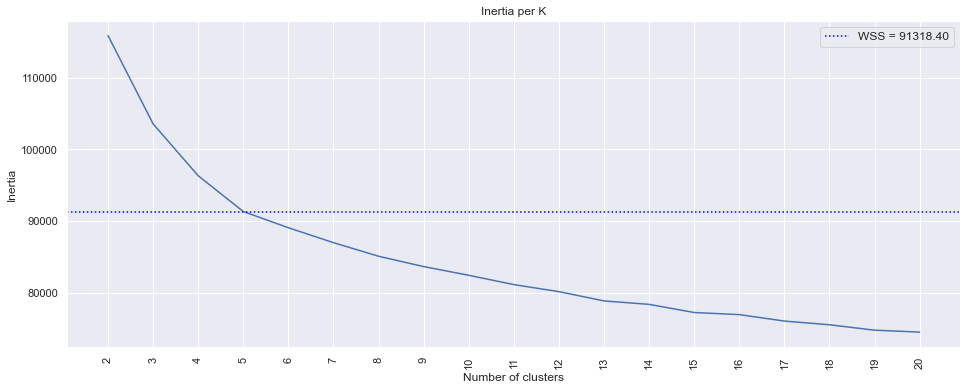

In [39]:
# Re - Running Kmeans on "new" data
df = df[feature_list]
X_train = df[feature_list].values

# Running K means with multible Ks

no_of_clusters = range(2,21) #[2,3,4,5,6,7,8,9]
inertia = []


for f in no_of_clusters:
    kmeans = KMeans(n_clusters=f, random_state=2)
    kmeans = kmeans.fit(X_train)
    u = kmeans.inertia_
    inertia.append(u)
    print("The innertia for :", f, "Clusters is:", u)

    
# Creating the scree plot for Intertia - elbow method
fig, (ax1) = plt.subplots(1, figsize=(16,6))
xx = np.arange(len(no_of_clusters))
ax1.plot(xx, inertia)
ax1.set_xticks(xx)
ax1.set_xticklabels(no_of_clusters, rotation='vertical')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title("Inertia per K")
plt.axhline(91318,linestyle=':', label='WSS = 91318.40', c ="blue")
plt.legend(prop=dict(size=12))



In [40]:
df.to_csv('../04. optimised_modelling/engineered.csv', index=False)